In [83]:
from google.colab import drive

In [84]:
import pandas as pd

In [85]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/German Credit Card/german_credit_data.csv')

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [88]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [89]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [90]:
df.value_counts('Saving accounts')

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
dtype: int64

In [91]:
df['Saving accounts'].fillna('Unknown',inplace=True)

In [92]:
df.value_counts('Checking account')

Checking account
little      274
moderate    269
rich         63
dtype: int64

In [93]:
df['Checking account'].fillna('Unknown', inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB




*  No of columns=10
* No of rows= 1000


datatype:

*    int64- Age, Job, Duration, Credit amount
                   
*   object- Sex, Housing,Saving accounts, Checking account, Purpose, Risk






In [95]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [96]:
df.value_counts('Purpose')

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
dtype: int64

In [97]:
df.value_counts('Risk')

Risk
good    700
bad     300
dtype: int64

In [98]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
columns = ["Sex","Risk"]
le = LabelEncoder()
for i in columns:
    df[i] = le.fit_transform(df[i])

In [99]:
#get dummy variaables
dummy=['Housing','Saving accounts','Checking account','Purpose']
for i in dummy:
 # df=pd.concat([df, pd.get_dummies(df[i])],axis=1)
  df = pd.concat([df, pd.get_dummies(df[i])], axis=1)

In [100]:
pd.cut(df['Age'], bins=[0,25,35,40,50,75], labels=['0-25','25-35', '35-40', '40-50','50-75'])

0      50-75
1       0-25
2      40-50
3      40-50
4      50-75
       ...  
995    25-35
996    35-40
997    35-40
998     0-25
999    25-35
Name: Age, Length: 1000, dtype: category
Categories (5, object): ['0-25' < '25-35' < '35-40' < '40-50' < '50-75']

In [101]:
df=pd.concat([df, pd.get_dummies(df['Age'])], axis=1)

In [102]:
df.drop(['Housing','Saving accounts','Checking account','Purpose','Age'], axis = 1, inplace=True)

In [103]:
df.head()

,Sex,Job,Credit amount,Duration,Risk,free,own,rent,Unknown,little,moderate,quite rich,rich,Unknown,little,moderate,rich,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,74,75
0,1,2,1169,6,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,2,5951,48,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2096,12,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,7882,42,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,4870,24,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
X=df.drop(['Risk'],axis=1)
y=df['Risk']

In [105]:
#splitting the data
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=1 )

In [107]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((700, 77), (300, 77), (700,), (300,))

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [155]:
# creating a base model
model = Sequential()
model.add(Dense(50, input_dim=77, kernel_initializer='he_uniform', activation='relu'))
#model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(30,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [156]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
22/22 [==============================] - 0s 1ms/step - loss: 0.7322 - accuracy: 0.5608
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6356 - accuracy: 0.6732
Epoch 3/10
22/22 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7341
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7692
Epoch 5/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7967
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7928
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8299
Epoch 8/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8180
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4093 - accuracy: 0.8334
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8329


In [157]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8429


[0.3789382874965668, 0.8428571224212646]

In [158]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.7567


[0.5735273361206055, 0.7566666603088379]

model accuracy is 75.6%

In [115]:
#baseline model 2
model = Sequential()
model.add(Dense(50, input_dim=77, kernel_initializer='he_uniform', activation='relu'))
#model.add(Dense(30,kernel_initializer='he_normal', activation='relu'))
model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
22/22 [==============================] - 0s 1ms/step - loss: 0.7985 - accuracy: 0.4590
Epoch 2/10
22/22 [==============================] - 0s 1ms/step - loss: 0.6015 - accuracy: 0.7144
Epoch 3/10
22/22 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.6938
Epoch 4/10
22/22 [==============================] - 0s 1ms/step - loss: 0.5243 - accuracy: 0.7375
Epoch 5/10
22/22 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7437
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7802
Epoch 7/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7666
Epoch 8/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7961
Epoch 9/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7860
Epoch 10/10
22/22 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8259


In [117]:
model.evaluate(X_train,y_train)

22/22 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8300


[0.40343016386032104, 0.8299999833106995]

In [118]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7367


[0.5757486820220947, 0.7366666793823242]

LR: 0.715714 (0.057658)
LDA: 0.712857 (0.051289)
KNN: 0.685714 (0.046511)
CART: 0.645714 (0.076345)
NB: 0.334286 (0.024075)
SVM: 0.722857 (0.058275)


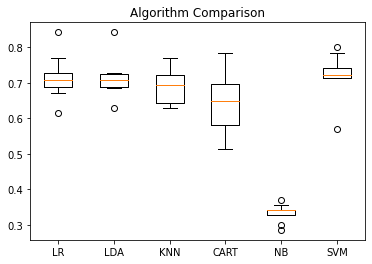

In [119]:
#buidling model3 using Decsion Tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [120]:
# Make predictions on test  data
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [121]:
# Evaluate predictions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.73
[[ 25  61]
 [ 20 194]]
              precision    recall  f1-score   support

           0       0.56      0.29      0.38        86
           1       0.76      0.91      0.83       214

    accuracy                           0.73       300
   macro avg       0.66      0.60      0.60       300
weighted avg       0.70      0.73      0.70       300



In [122]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [123]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6766666666666666
[[ 42  44]
 [ 53 161]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.46        86
           1       0.79      0.75      0.77       214

    accuracy                           0.68       300
   macro avg       0.61      0.62      0.62       300
weighted avg       0.69      0.68      0.68       300



The highest accuracy we get is 75.6% on test  data and 84.2 % on train data , by training a supervised neural network 